In [1]:
import numpy as np

def laplace_solver(nx, ny, niter, D):
    # Инициализация сетки
    # массивы для хранения значений потенциала и их предыдущих версий
    fi = np.zeros((nx, ny))
    fi_new = np.zeros((nx, ny))
    fi_prec = np.copy(fi)

    # Установка начальных условий (пример: начальное значение в середине)
    fi[nx//2, ny//2] = 1.0

    # Цикл по итерациям
    for iteration in range(1, niter + 1):
        s1 = 0
        s2 = 0
        s3 = 0
    
        # пробегают все точки сетки, кроме граничных   
        # Цикл по X
        for ix in range(2, nx - 1):
            # Цикл по Y
            for iy in range(2, ny - 1):
                # На каждом шаге значения потенциала (fi_new) 
                # вычисляются на основе соседних точек (==1\4 * сумма соседей)
                fi_new[ix, iy] = 0.25 * (fi[ix + 1, iy] + fi[ix - 1, iy] + fi[ix, iy + 1] + fi[ix, iy - 1])
                
                tem = abs(fi_new[ix, iy] - fi_prec[ix, iy])
                
                # контроль точности
                if s1 < (tem / D):
                    s1 = tem / D
                
                s2 += (fi_new[ix, iy] - fi_prec[ix, iy]) ** 2
                s3 += fi_prec[ix, iy] ** 2

        # Условие для избежания деления на ноль
        if s3 != 0:
            s2 = (s2 / s3) ** 0.5

        # Условие завершения (контроль точности)
        if s1 < 1e-6:
            break

        # Обновление значений
        fi_prec = np.copy(fi_new)
        # Обновление значений массива fi
        fi[ix, iy] = fi_new[ix, iy]

    return fi_new

# Параметры задачи
nx = 7  # Количество точек по x
ny = 7  # Количество точек по y
niter = 100000  # Количество итераций
D = 0.001  # Параметр для контроля точности

# Получение решения
solution = laplace_solver(nx, ny, niter, D)

# Вывод решения
print("Решение уравнения Лапласа:")
print(solution)


Решение уравнения Лапласа:
[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.25 0.   0.25 0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]]



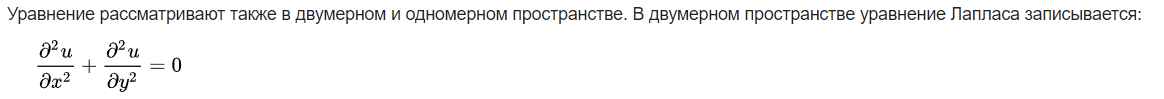

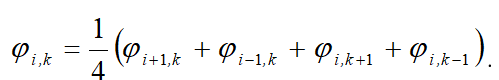

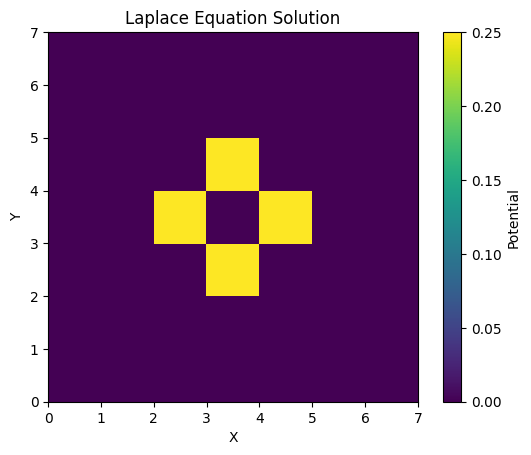

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_solution(solution):
    plt.imshow(solution, cmap='viridis', origin='lower', extent=[0, solution.shape[0], 0, solution.shape[1]])
    plt.colorbar(label='Potential')
    plt.title('Laplace Equation Solution')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Параметры задачи
nx = 7
ny = 7
niter = 100000
D = 0.001

# Получение решения
solution = laplace_solver(nx, ny, niter, D)

# Вывод графика
plot_solution(solution)
